# $$\text{Variational Monte Carlo Simulation}$$
## $\text{Hydrogen Atom}$ 
- $\text{Name: Utkarsh Maurya}$
- $\text{Roll No.: PH21B012}$

In [1]:
import numba
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Libraries needed: numpy, matplotlib, numba, tqdm   
If the code shows module not found, install the required libraries using example:   
`!pip install numba`

In [2]:
# Numba is a library which supports parallelization, which makes Monte Carlo Simulations Faster

# Defining the trial wavefunction for Hydrogen Atom
@numba.njit
def psi_H(x, a):
    return a * x * np.exp(-a * x)

# Defining the local energy
@numba.njit
def EL_H(x, a):
    return -1/x - a/2 * (a - 2/x)

def exact_energy_H(a):
    return 1/2 * (a**2 - 2*a)

# Metropolis algorithm
@numba.njit
def metropolis_sampling_H(mcs, a, step_size):
    samples = np.zeros(mcs)
    x = 0.1
    for i in range(mcs):
        x_new = x + np.random.uniform(-step_size, step_size)

        prob_ratio = (psi_H(x_new, a)**2) / (psi_H(x, a)**2)
        
        if np.random.uniform(0, 1) < prob_ratio and x_new > 0:
            x = x_new
        
        samples[i] = x
    return samples

# Variational Monte Carlo
@numba.njit
def VMC_H(mcs, a, step_size=1.0):
    samples = metropolis_sampling_H(mcs, a, step_size)
    
    local_energies = EL_H(samples, a)
    
    E = np.mean(local_energies[mcs//2:])
    E_var = np.var(local_energies[mcs//2:])
    
    return E, E_var, samples

mcs = int(2*1e5)
alpha_list = np.linspace(0.2,1.6,15)
step_size = 4

E_list_H = []
E_var_list_H = []
for i in range(len(alpha_list)):
    a = float(alpha_list[i])
    E, E_var, samples = VMC_H(mcs, a, step_size)
    E_list_H.append(E)
    E_var_list_H.append(E_var)

#### $\text{Data}$

In [3]:
data2 = {
    'alpha': alpha_list,
    'H': E_list_H,
    'sigma2': E_var_list_H
}
df2 = pd.DataFrame(data2)
print(df2)

    alpha         H    sigma2
0     0.2 -0.179949  0.023112
1     0.3 -0.254646  0.040564
2     0.4 -0.324208  0.064970
3     0.5 -0.374980  0.062481
4     0.6 -0.419125  0.053064
5     0.7 -0.456128  0.043492
6     0.8 -0.478131  0.024013
7     0.9 -0.494586  0.006826
8     1.0 -0.500000  0.000000
9     1.1 -0.494872  0.011334
10    1.2 -0.481540  0.051729
11    1.3 -0.456310  0.155881
12    1.4 -0.421276  0.265990
13    1.5 -0.380437  0.465562
14    1.6 -0.330603  0.849883


#### $\text{Plot}$

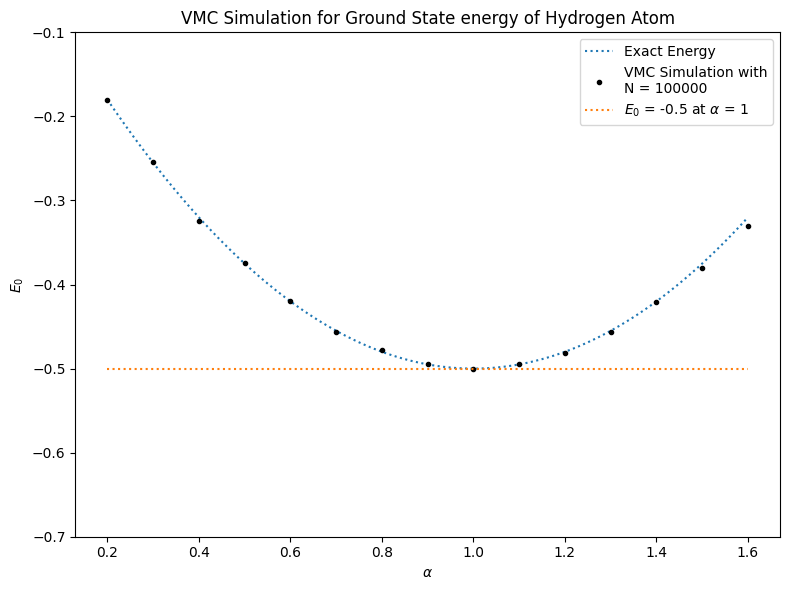

In [4]:
a2 = np.linspace(0.2,1.6,100)
plt.figure(figsize=(8,6))
plt.plot(a2, exact_energy_H(a2),':', label='Exact Energy')
plt.plot(alpha_list,E_list_H,'k.', label='VMC Simulation with\nN = 100000')
plt.plot(a2, np.ones(len(a2))*-0.5,':', label='$E_0$ = -0.5 at $\\alpha$ = 1')
plt.title('VMC Simulation for Ground State energy of Hydrogen Atom')
plt.ylim(-0.7,-0.1)
plt.xlabel('$\\alpha$')
plt.ylabel('$E_0$')
plt.legend()
plt.tight_layout()
plt.savefig('plot2.png',dpi=300)
plt.show()